In [102]:
from scipy.spatial import distance_matrix
import numpy as np
import matplotlib.pyplot as plt

In [103]:
file_path = '../2nd deliverable/solomon-100/c101.txt'

# Initialize lists to store vehicle and customer data
vehicle_data = []
customer_data = []

# Read data line by line
with open(file_path, 'r') as file:
    lines = file.readlines()
    
    # Parse vehicle data
    vehicle_info_start = lines.index('VEHICLE\n') + 2
    vehicle_info_end = lines.index('CUSTOMER\n')
    vehicle_line = lines[vehicle_info_start].strip().split()
    
    # Store vehicle data as a dictionary in a list
    vehicle_data.append({
        'NUMBER': int(vehicle_line[0]),
        'CAPACITY': int(vehicle_line[1])
    })
    
    # Parse customer data
    customer_info_start = vehicle_info_end + 2
    for line in lines[customer_info_start:]:
        if line.strip():  # Skip any empty lines
            parts = line.strip().split()
            customer_data.append({
                'CUST_NO': int(parts[0]),
                'XCOORD': int(parts[1]),
                'YCOORD': int(parts[2]),
                'DEMAND': int(parts[3]),
                'READY_TIME': int(parts[4]),
                'DUE_DATE': int(parts[5]),
                'SERVICE_TIME': int(parts[6])
            })

# Display the parsed data
print("Vehicle Data:")
print(vehicle_data)
print("\nCustomer Data:")
for customer in customer_data:  # Show first 5 customers for brevity
    print(customer)


Vehicle Data:
[{'NUMBER': 25, 'CAPACITY': 200}]

Customer Data:
{'CUST_NO': 0, 'XCOORD': 40, 'YCOORD': 50, 'DEMAND': 0, 'READY_TIME': 0, 'DUE_DATE': 1236, 'SERVICE_TIME': 0}
{'CUST_NO': 1, 'XCOORD': 45, 'YCOORD': 68, 'DEMAND': 10, 'READY_TIME': 912, 'DUE_DATE': 967, 'SERVICE_TIME': 90}
{'CUST_NO': 2, 'XCOORD': 45, 'YCOORD': 70, 'DEMAND': 30, 'READY_TIME': 825, 'DUE_DATE': 870, 'SERVICE_TIME': 90}
{'CUST_NO': 3, 'XCOORD': 42, 'YCOORD': 66, 'DEMAND': 10, 'READY_TIME': 65, 'DUE_DATE': 146, 'SERVICE_TIME': 90}
{'CUST_NO': 4, 'XCOORD': 42, 'YCOORD': 68, 'DEMAND': 10, 'READY_TIME': 727, 'DUE_DATE': 782, 'SERVICE_TIME': 90}
{'CUST_NO': 5, 'XCOORD': 42, 'YCOORD': 65, 'DEMAND': 10, 'READY_TIME': 15, 'DUE_DATE': 67, 'SERVICE_TIME': 90}
{'CUST_NO': 6, 'XCOORD': 40, 'YCOORD': 69, 'DEMAND': 20, 'READY_TIME': 621, 'DUE_DATE': 702, 'SERVICE_TIME': 90}
{'CUST_NO': 7, 'XCOORD': 40, 'YCOORD': 66, 'DEMAND': 20, 'READY_TIME': 170, 'DUE_DATE': 225, 'SERVICE_TIME': 90}
{'CUST_NO': 8, 'XCOORD': 38, 'YCOORD':

In [104]:
class Node:
    def __init__(self, id, x, y, demand, ready_time, due_date, service_time):
        self.id = id
        self.is_depot = (id == 0)
        self.x = x
        self.y = y
        self.demand = demand
        self.ready_time = ready_time
        self.due_date = due_date
        self.service_time = service_time
        

In [105]:
class Graph:
    def __init__(self, vehicle_data, customer_data):
        self.vehicle_data = vehicle_data
        self.customer_data = customer_data
        self.nodes = []
        self.vehicle_capacity = vehicle_data[0]['CAPACITY']
        self.num_vehicles = vehicle_data[0]['NUMBER']
        self.setup_nodes()
        self.setup_distance_matrix()
        self.setup_heuristic_matrix()
        self.initialize_pheromone_matrix()
        
    def setup_heuristic_matrix(self):
        self.heuristic_matrix = 1 / self.distance_matrix
        
    def setup_nodes(self):
        for customer in self.customer_data:
            node = Node(customer['CUST_NO'], customer['XCOORD'], customer['YCOORD'], customer['DEMAND'],
                        customer['READY_TIME'], customer['DUE_DATE'], customer['SERVICE_TIME'])
            self.nodes.append(node)
    
    def setup_distance_matrix(self):
        coords = [(node.x, node.y) for node in self.nodes]
        self.distance_matrix = distance_matrix(coords, coords)
        
    def initialize_pheromone_matrix(self):
        n = len(self.nodes)
        self.pheromone_matrix = [[1.0 for _ in range(n)] for _ in range(n)]
    
    def route_distance(self, route):
        distance = 0
        for i in range(len(route) - 1):
            distance += self.distance_matrix[route[i]][route[i + 1]]
        return distance
    
    def update_pheromones(self, ant_solutions, evaporation_rate=0.5):
        # Evaporate pheromones
        for i in range(len(self.pheromone_matrix)):
            for j in range(len(self.pheromone_matrix)):
                self.pheromone_matrix[i][j] *= (1 - evaporation_rate)
        
        # Deposit pheromones based on ant solutions
        for solution in ant_solutions:  # Each solution is a set of routes
            for route in solution:
                for k in range(len(route) - 1):
                    i, j = route[k], route[k + 1]
                    self.pheromone_matrix[i][j] += 1 / self.route_distance(route)  # Deposit



C:\Users\Axel\AppData\Local\Temp\ipykernel_24108\3426492418.py:14: RuntimeWarning: divide by zero encountered in divide
  self.heuristic_matrix = 1 / self.distance_matrix


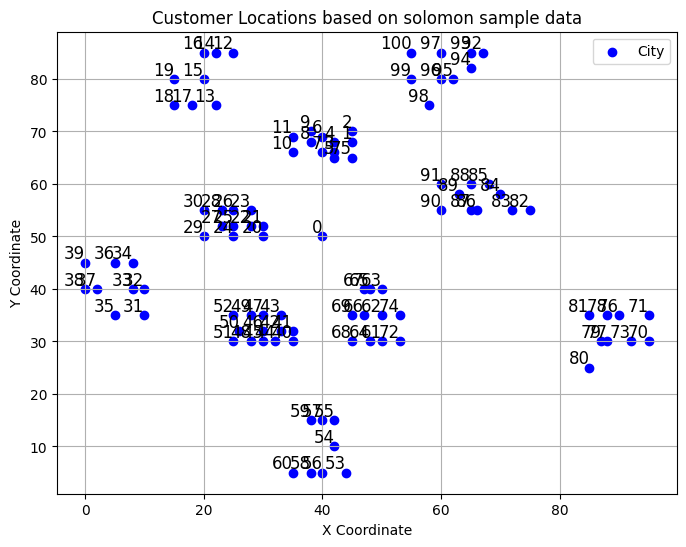

In [106]:
G = Graph(vehicle_data, customer_data)

customer_locations = np.array([(node.x, node.y) for node in G.nodes])

# Step 2: Visualize the Cities
plt.figure(figsize=(8, 6))
plt.scatter(customer_locations[:, 0], customer_locations[:, 1], c='blue', label='City')
for i, (x, y) in enumerate(customer_locations):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')
plt.title("Customer Locations based on solomon sample data")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()

Meilleur coût total : 1697.19
Camion 1 : Chemin - Dépôt -> 0 -> 20 -> 21 -> 47 -> Dépôt | Poids : 40
  Distance parcourue par le camion 1 : 29.0 km
Camion 2 : Chemin - Dépôt -> 22 -> 49 -> Dépôt | Poids : 30
  Distance parcourue par le camion 2 : 76.19 km
Camion 3 : Chemin - Dépôt -> 67 -> 65 -> 63 -> 62 -> 74 -> 72 -> 61 -> 64 -> 68 -> 69 -> Dépôt | Poids : 190
  Distance parcourue par le camion 3 : 136.61 km
Camion 4 : Chemin - Dépôt -> 23 -> 75 -> Dépôt | Poids : 30
  Distance parcourue par le camion 4 : 185.14 km
Camion 5 : Chemin - Dépôt -> 24 -> 25 -> 27 -> 28 -> 26 -> 34 -> 52 -> Dépôt | Poids : 120
  Distance parcourue par le camion 5 : 264.4 km
Camion 6 : Chemin - Dépôt -> 5 -> 3 -> 4 -> 1 -> Dépôt | Poids : 40
  Distance parcourue par le camion 6 : 306.75 km
Camion 7 : Chemin - Dépôt -> 7 -> 8 -> 9 -> 6 -> 2 -> Dépôt | Poids : 100
  Distance parcourue par le camion 7 : 353.59 km
Camion 8 : Chemin - Dépôt -> 66 -> Dépôt | Poids : 10
  Distance parcourue par le camion 8 : 390.7

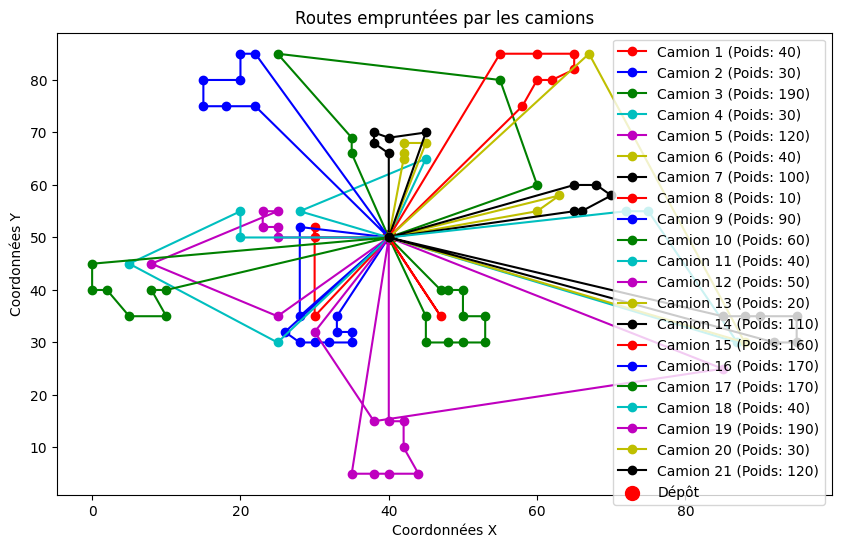

Meilleur coût total : 1697.19
Camion 1 : Chemin - Dépôt -> 0 -> 20 -> 21 -> 47 -> Dépôt | Poids : 40
  Distance parcourue par le camion 1 : 29.0 km
Camion 2 : Chemin - Dépôt -> 22 -> 49 -> Dépôt | Poids : 30
  Distance parcourue par le camion 2 : 76.19 km
Camion 3 : Chemin - Dépôt -> 67 -> 65 -> 63 -> 62 -> 74 -> 72 -> 61 -> 64 -> 68 -> 69 -> Dépôt | Poids : 190
  Distance parcourue par le camion 3 : 136.61 km
Camion 4 : Chemin - Dépôt -> 23 -> 75 -> Dépôt | Poids : 30
  Distance parcourue par le camion 4 : 185.14 km
Camion 5 : Chemin - Dépôt -> 24 -> 25 -> 27 -> 28 -> 26 -> 34 -> 52 -> Dépôt | Poids : 120
  Distance parcourue par le camion 5 : 264.4 km
Camion 6 : Chemin - Dépôt -> 5 -> 3 -> 4 -> 1 -> Dépôt | Poids : 40
  Distance parcourue par le camion 6 : 306.75 km
Camion 7 : Chemin - Dépôt -> 7 -> 8 -> 9 -> 6 -> 2 -> Dépôt | Poids : 100
  Distance parcourue par le camion 7 : 353.59 km
Camion 8 : Chemin - Dépôt -> 66 -> Dépôt | Poids : 10
  Distance parcourue par le camion 8 : 390.7

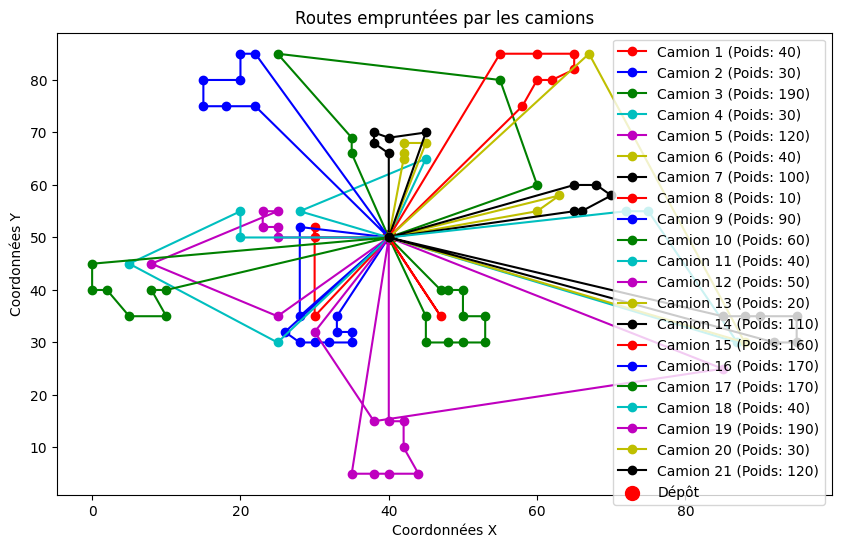

Meilleur coût total : 1697.19
Camion 1 : Chemin - Dépôt -> 0 -> 20 -> 21 -> 47 -> Dépôt | Poids : 40
  Distance parcourue par le camion 1 : 29.0 km
Camion 2 : Chemin - Dépôt -> 22 -> 49 -> Dépôt | Poids : 30
  Distance parcourue par le camion 2 : 76.19 km
Camion 3 : Chemin - Dépôt -> 67 -> 65 -> 63 -> 62 -> 74 -> 72 -> 61 -> 64 -> 68 -> 69 -> Dépôt | Poids : 190
  Distance parcourue par le camion 3 : 136.61 km
Camion 4 : Chemin - Dépôt -> 23 -> 75 -> Dépôt | Poids : 30
  Distance parcourue par le camion 4 : 185.14 km
Camion 5 : Chemin - Dépôt -> 24 -> 25 -> 27 -> 28 -> 26 -> 34 -> 52 -> Dépôt | Poids : 120
  Distance parcourue par le camion 5 : 264.4 km
Camion 6 : Chemin - Dépôt -> 5 -> 3 -> 4 -> 1 -> Dépôt | Poids : 40
  Distance parcourue par le camion 6 : 306.75 km
Camion 7 : Chemin - Dépôt -> 7 -> 8 -> 9 -> 6 -> 2 -> Dépôt | Poids : 100
  Distance parcourue par le camion 7 : 353.59 km
Camion 8 : Chemin - Dépôt -> 66 -> Dépôt | Poids : 10
  Distance parcourue par le camion 8 : 390.7

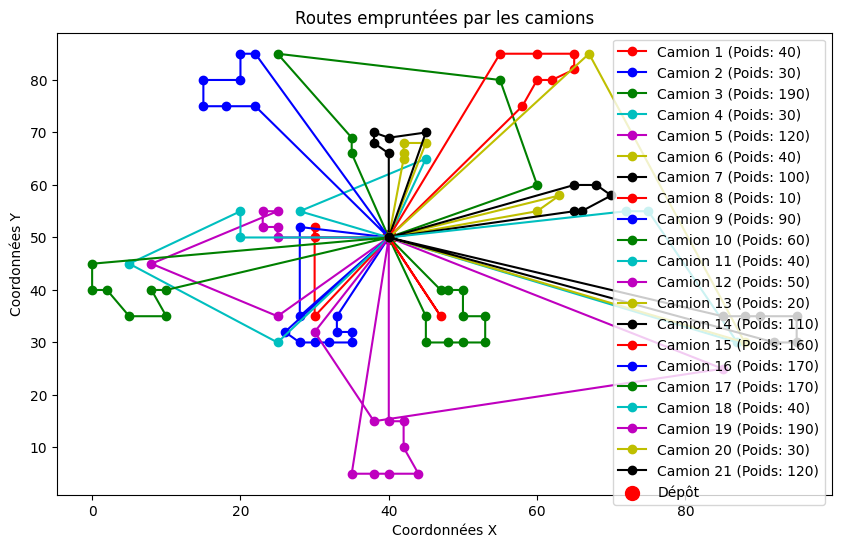

Meilleur coût total : 1697.19
Camion 1 : Chemin - Dépôt -> 0 -> 20 -> 21 -> 47 -> Dépôt | Poids : 40
  Distance parcourue par le camion 1 : 29.0 km
Camion 2 : Chemin - Dépôt -> 22 -> 49 -> Dépôt | Poids : 30
  Distance parcourue par le camion 2 : 76.19 km
Camion 3 : Chemin - Dépôt -> 67 -> 65 -> 63 -> 62 -> 74 -> 72 -> 61 -> 64 -> 68 -> 69 -> Dépôt | Poids : 190
  Distance parcourue par le camion 3 : 136.61 km
Camion 4 : Chemin - Dépôt -> 23 -> 75 -> Dépôt | Poids : 30
  Distance parcourue par le camion 4 : 185.14 km
Camion 5 : Chemin - Dépôt -> 24 -> 25 -> 27 -> 28 -> 26 -> 34 -> 52 -> Dépôt | Poids : 120
  Distance parcourue par le camion 5 : 264.4 km
Camion 6 : Chemin - Dépôt -> 5 -> 3 -> 4 -> 1 -> Dépôt | Poids : 40
  Distance parcourue par le camion 6 : 306.75 km
Camion 7 : Chemin - Dépôt -> 7 -> 8 -> 9 -> 6 -> 2 -> Dépôt | Poids : 100
  Distance parcourue par le camion 7 : 353.59 km
Camion 8 : Chemin - Dépôt -> 66 -> Dépôt | Poids : 10
  Distance parcourue par le camion 8 : 390.7

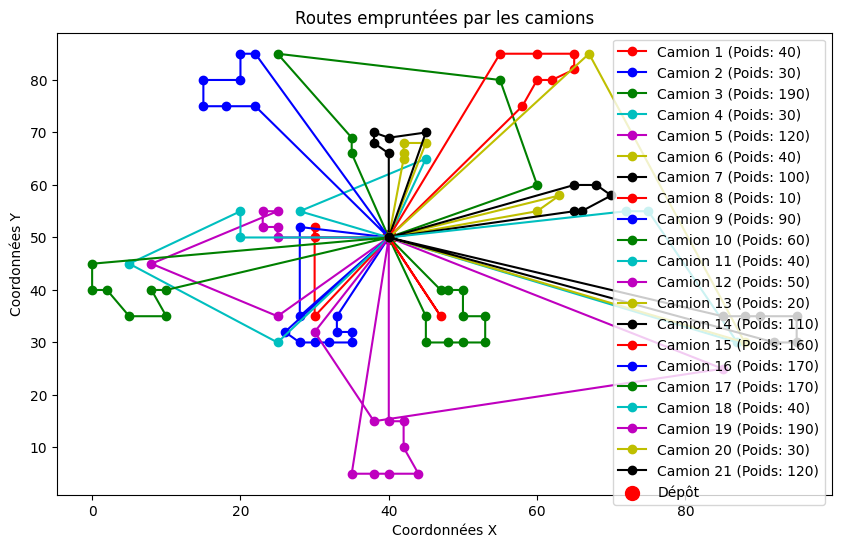

Meilleur coût total : 1697.19
Camion 1 : Chemin - Dépôt -> 0 -> 20 -> 21 -> 47 -> Dépôt | Poids : 40
  Distance parcourue par le camion 1 : 29.0 km
Camion 2 : Chemin - Dépôt -> 22 -> 49 -> Dépôt | Poids : 30
  Distance parcourue par le camion 2 : 76.19 km
Camion 3 : Chemin - Dépôt -> 67 -> 65 -> 63 -> 62 -> 74 -> 72 -> 61 -> 64 -> 68 -> 69 -> Dépôt | Poids : 190
  Distance parcourue par le camion 3 : 136.61 km
Camion 4 : Chemin - Dépôt -> 23 -> 75 -> Dépôt | Poids : 30
  Distance parcourue par le camion 4 : 185.14 km
Camion 5 : Chemin - Dépôt -> 24 -> 25 -> 27 -> 28 -> 26 -> 34 -> 52 -> Dépôt | Poids : 120
  Distance parcourue par le camion 5 : 264.4 km
Camion 6 : Chemin - Dépôt -> 5 -> 3 -> 4 -> 1 -> Dépôt | Poids : 40
  Distance parcourue par le camion 6 : 306.75 km
Camion 7 : Chemin - Dépôt -> 7 -> 8 -> 9 -> 6 -> 2 -> Dépôt | Poids : 100
  Distance parcourue par le camion 7 : 353.59 km
Camion 8 : Chemin - Dépôt -> 66 -> Dépôt | Poids : 10
  Distance parcourue par le camion 8 : 390.7

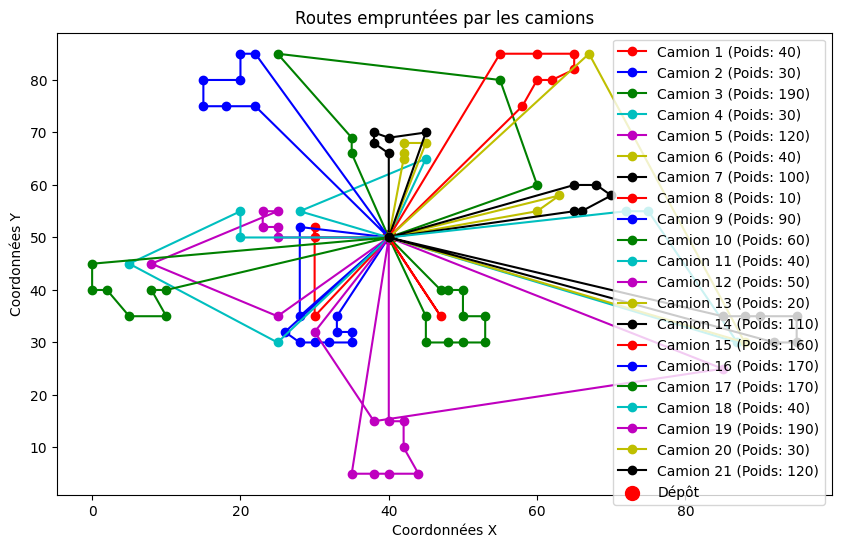

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ACO Class
class AntColonyOptimization:
    def __init__(self, vehicle_data, customer_data, alpha=1.0, beta=2.0):
        self.num_vehicles = vehicle_data[0]['NUMBER']
        self.vehicle_capacity = vehicle_data[0]['CAPACITY']
        self.customer_data = customer_data
        self.depot_coords = customer_data[0]
        self.depot_ready_time = customer_data[0]['READY_TIME']
        self.depot_due_date = customer_data[0]['DUE_DATE']
        self.distance_matrix = self.calculate_distance_matrix()
        self.pheromone = np.ones_like(self.distance_matrix)
        self.alpha = alpha
        self.beta = beta
        self.best_solution = None
        self.best_cost = float('inf')
        self.unserved_customers = []  # Nouvelle liste pour clients non desservis

    def calculate_distance_matrix(self):
        num_customers = len(self.customer_data)
        matrix = np.zeros((num_customers + 1, num_customers + 1))
        for i in range(num_customers + 1):
            for j in range(i + 1, num_customers + 1):
                if i == 0:
                    dist = np.sqrt((self.depot_coords['XCOORD'] - self.customer_data[j-1]['XCOORD'])**2 +
                                   (self.depot_coords['YCOORD'] - self.customer_data[j-1]['YCOORD'])**2)
                elif j == 0:
                    dist = np.sqrt((self.depot_coords['XCOORD'] - self.customer_data[i-1]['XCOORD'])**2 +
                                   (self.depot_coords['YCOORD'] - self.customer_data[i-1]['YCOORD'])**2)
                else:
                    dist = np.sqrt((self.customer_data[i-1]['XCOORD'] - self.customer_data[j-1]['XCOORD'])**2 +
                                   (self.customer_data[i-1]['YCOORD'] - self.customer_data[j-1]['YCOORD'])**2)
                matrix[i, j] = matrix[j, i] = dist
        return matrix

    def choose_next_customer(self, visited, current_customer, truck_load, current_time):
        pheromone = self.pheromone[current_customer]
        pheromone[visited] = 0
        distance = self.distance_matrix[current_customer] + 1e-6
        probability = pheromone ** self.alpha * (1.0 / distance) ** self.beta

        if np.sum(probability) == 0:
            probability = np.ones_like(probability)
        probability /= np.sum(probability)

        for next_customer in np.argsort(-probability):  # Try customers in probability order
            if next_customer not in visited and next_customer > 0:
                customer = self.customer_data[next_customer - 1]
                if (truck_load + customer['DEMAND'] <= self.vehicle_capacity and
                        current_time + self.distance_matrix[current_customer, next_customer] <= customer['DUE_DATE']):
                    return next_customer
        return 0  # Return to depot

    def simulate_ant(self):
        routes = []
        visited = [0]
        total_distance = 0
        current_time = self.depot_ready_time
        unserved_customers = []  # Liste des clients non desservis pour cette simulation

        for _ in range(self.num_vehicles):
            route = []
            truck_load = 0
            current_customer = 0
            route_time = current_time

            while True:
                next_customer = self.choose_next_customer(visited, current_customer, truck_load, route_time)
                if next_customer == 0:
                    break

                customer = self.customer_data[next_customer - 1]
                travel_time = self.distance_matrix[current_customer, next_customer]
                arrival_time = route_time + travel_time

                if arrival_time < customer['READY_TIME']:
                    arrival_time = customer['READY_TIME']  # Wait if arriving early
                if arrival_time > customer['DUE_DATE']:
                    unserved_customers.append(customer)  # Marquer le client comme non desservi
                    visited.append(next_customer)  # Ajouter le client comme "visité" pour éviter de le revisiter
                    continue  # Passer au client suivant

                route_time = arrival_time + customer['SERVICE_TIME']
                truck_load += customer['DEMAND']
                visited.append(next_customer)
                route.append(next_customer)
                total_distance += travel_time
                current_customer = next_customer

            if route:
                routes.append((route, truck_load, total_distance))
                total_distance += self.distance_matrix[current_customer, 0]  # Return to depot
                route_time += self.distance_matrix[current_customer, 0]  # Update route time

        # Enregistrer les clients non desservis pour cette simulation
        for customer in self.customer_data:
            if customer['CUST_NO'] not in visited and customer not in unserved_customers:
                unserved_customers.append(customer)

        self.unserved_customers = unserved_customers  # Met à jour la liste globale
        return routes, round(total_distance, 2)

    def run(self, iterations=100):
        for _ in range(iterations):
            solution, total_cost = self.simulate_ant()
            if total_cost < self.best_cost:
                self.best_cost = total_cost
                self.best_solution = solution
        return self.best_solution, self.best_cost, self.unserved_customers


# Plotting routes
def plot_routes(depot_coords, routes, customer_data):
    plt.figure(figsize=(10, 6))
    colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']  # Predefined colors for up to 7 trucks
    for i, (route, truck_load, _) in enumerate(routes):
        color = colors[i % len(colors)]
        x = [depot_coords['XCOORD']] + [customer_data[customer-1]['XCOORD'] for customer in route] + [depot_coords['XCOORD']]
        y = [depot_coords['YCOORD']] + [customer_data[customer-1]['YCOORD'] for customer in route] + [depot_coords['YCOORD']]
        plt.plot(x, y, marker='o', label=f"Camion {i+1} (Poids: {truck_load})", color=color)
    plt.scatter(depot_coords['XCOORD'], depot_coords['YCOORD'], color='red', s=100, label="Dépôt")
    plt.xlabel("Coordonnées X")
    plt.ylabel("Coordonnées Y")
    plt.title("Routes empruntées par les camions")
    plt.legend()
    plt.show()


# Main Process
def execution(alpha=1.0, beta=2.0):
    aco = AntColonyOptimization(vehicle_data , customer_data, alpha=alpha, beta=beta)
    best_solution, best_cost, unserved_customers = aco.run()

    # Affichage des résultats
    print(f"Meilleur coût total : {round(best_cost, 2)}")
    total_distance = 0  # Distance totale parcourue par tous les camions
    for i, (route, truck_load, route_distance) in enumerate(best_solution):
        customer_ids = [customer_data[customer-1]['CUST_NO'] for customer in route]
        print(f"Camion {i+1} : Chemin - Dépôt -> " + " -> ".join(map(str, customer_ids)) + f" -> Dépôt | Poids : {truck_load}")
        print(f"  Distance parcourue par le camion {i+1} : {round(route_distance, 2)} km")
        total_distance += route_distance

    print(f"\nDistance totale parcourue par tous les camions : {round(total_distance, 2)} km")

    # Afficher les clients non desservis
    if unserved_customers:
        print("\nClients non desservis :")
        for customer in unserved_customers:
            print(f"Client {customer['CUST_NO']} | Fenêtre de temps : [{customer['READY_TIME']}, {customer['DUE_DATE']}] | Demande : {customer['DEMAND']}")
    else:
        print("\nTous les clients ont été desservis.")

    plot_routes(aco.depot_coords, best_solution, customer_data)


if __name__ == "__main__":
    execution(1,2)
